In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [2]:
modelFolder = 'all'

In [21]:
data = pd.read_csv(modelFolder + '/data.csv', 
                   delimiter=',', 
                   names=['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик', 'target'])
trainingTemperatures = data[['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик']]
trainingTemperatures = shuffle(trainingTemperatures)
trainingTemperatures.reset_index(inplace=True, drop=True)
trainingTemperatures.head()

,0ртм,1ртм,2ртм,3ртм,4ртм,5ртм,6ртм,7ртм,8ртм,0ик,1ик,2ик,3ик,4ик,5ик,6ик,7ик,8ик
0,33.0,32.9,32.7,32.7,32.5,32.4,32.0,31.5,32.0,31.4,31.4,30.8,30.6,30.2,30.7,28.9,27.9,29.2
1,34.5,33.7,33.8,34.1,33.8,33.7,33.8,33.5,33.6,32.5,32.9,33.0,33.0,33.5,32.5,32.6,32.5,32.2
2,32.0,32.6,32.9,33.1,33.3,33.7,33.3,32.4,33.1,30.0,30.4,30.8,30.8,31.1,31.1,30.9,30.5,30.7
3,33.5,33.1,33.7,32.6,32.7,33.2,33.4,33.2,33.3,29.8,29.9,30.2,30.0,30.0,31.1,29.4,29.6,29.8
4,35.3,35.6,35.6,35.7,35.7,35.1,35.0,35.5,35.6,32.8,34.1,34.0,33.9,33.9,33.6,33.6,33.5,33.9


In [22]:
testingData = pd.read_csv(modelFolder + '/testing.csv', 
                          delimiter=',', 
                          names=['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик', 'target'])
testingTemperatures = testingData[['0ртм', '1ртм', '2ртм', '3ртм', '4ртм', '5ртм', '6ртм', '7ртм', '8ртм', 
                          '0ик', '1ик', '2ик', '3ик', '4ик', '5ик', '6ик', '7ик', '8ик']]

# Метод SVM

In [23]:
#SVM
clf = svm.SVC(gamma='scale')
clf.fit(trainingTemperatures, data.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Правильно определено: 57 
Неправильно: 23


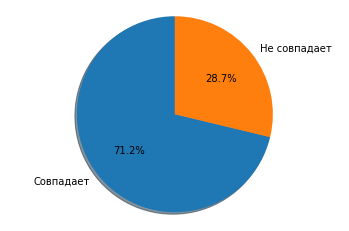

In [24]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Метод KNN (Ближайших соседей)

In [25]:
#KNN
clf = neighbors.KNeighborsClassifier(20, weights='uniform')
clf.fit(trainingTemperatures, data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Правильно определено: 53 
Неправильно: 27


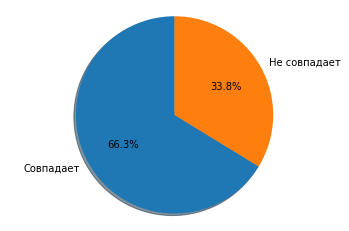

In [26]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Наивный баейсовский классификатор

In [27]:
#NB
gnb = GaussianNB()
clf = gnb.fit(trainingTemperatures, data.target)

Правильно определено: 45 
Неправильно: 35


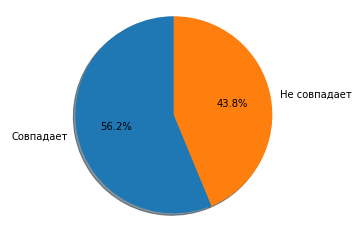

In [28]:
classes = clf.predict(testingTemperatures)

testingData.target
res = testingData.target == classes
trueCount = 0
for el in res:
    if el == True:
        trueCount += 1

print('Правильно определено:', trueCount, '\nНеправильно:', len(res) - trueCount)

labels = 'Совпадает', 'Не совпадает'
values = [trueCount, len(res) - trueCount]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()